In [14]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

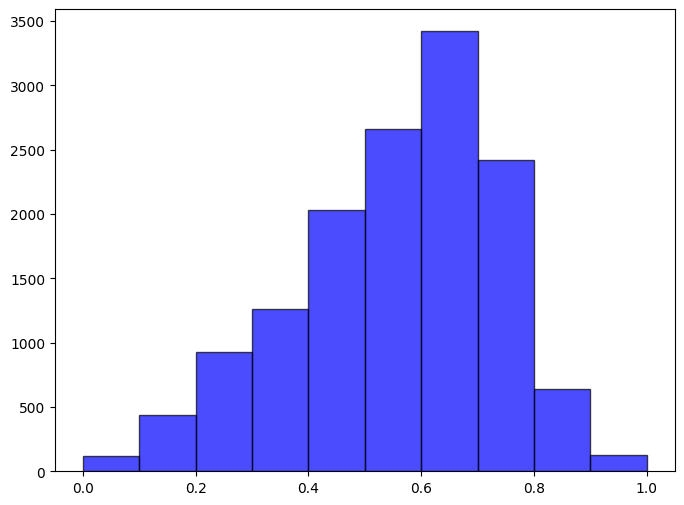

In [43]:
df = pd.read_csv('data/rsna/all_features.csv')
data = df['boneage norm'].values

num_bins = 10

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=num_bins, color="blue", edgecolor="black", alpha=0.7)

plt.show()


In [29]:
num_bins = 10
bin_edges = np.linspace(0, 1, num_bins + 1)  # Bin edges from 0 to 1
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin means

# Assign each value to a bin
bin_indices = np.digitize(data, bin_edges, right=True) - 1  # Get bin indices

# Replace each value with the corresponding bin mean
binned_data = bin_centers[bin_indices]

Original: [0.78854626 0.04845815 0.40969163 0.52422907 0.35682819 0.60352423
 0.65638767 0.68281938 0.15418502 0.60352423]
Binned  : [0.75 0.05 0.45 0.55 0.35 0.65 0.65 0.65 0.15 0.65]


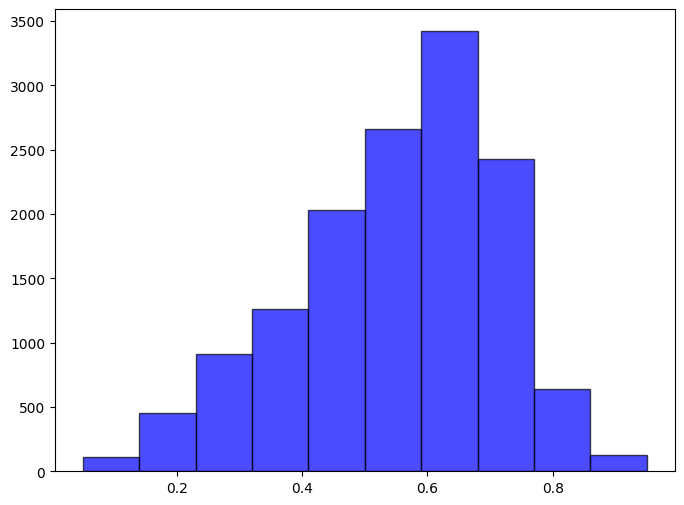

In [30]:
plt.figure(figsize=(8, 6))
plt.hist(binned_data, bins=num_bins, color="blue", edgecolor="black", alpha=0.7)

plt.show()

In [ ]:
def get_fold_indices(data_df, seed, data_percentage=0.25):
    dd = {} # data dict
    
    ids = data_df['id'].values
    sample_size = int(data_percentage * ids.size)
    ids = np.random.choice(ids, size=sample_size, replace=False)
    
    train_val, dd['test'] = train_test_split(ids, test_size=0.25, random_state=seed)
    dd['train'], dd['val'] = train_test_split(train_val, test_size=0.15, random_state=seed)

In [44]:
num_bins = 10
bin_edges = np.linspace(0, 1, num_bins + 1)  # Bin edges from 0 to 1
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Compute bin means

# Assign each value to a bin
bin_indices = np.digitize(data, bin_edges, right=True) - 1  # Get bin indices

# Replace each value with the corresponding bin mean
binned_data = bin_centers[bin_indices]
binned_data

array([0.75, 0.05, 0.45, ..., 0.85, 0.55, 0.55])

In [45]:
df['boneage binned'] = binned_data
_ , X, _, y = train_test_split(df['path'], df['boneage binned'], test_size = 0.125, stratify=df['boneage binned'], random_state=42)

In [46]:
X

488          data/rsna/boneage-training-dataset/1928.png
13390    data/rsna/boneage-validation-dataset-1/9580.png
11748       data/rsna/boneage-training-dataset/14651.png
1377         data/rsna/boneage-training-dataset/2906.png
6502         data/rsna/boneage-training-dataset/8793.png
                              ...                       
10192       data/rsna/boneage-training-dataset/12910.png
10630       data/rsna/boneage-training-dataset/13400.png
7474         data/rsna/boneage-training-dataset/9867.png
4308         data/rsna/boneage-training-dataset/6344.png
2388         data/rsna/boneage-training-dataset/4034.png
Name: path, Length: 1755, dtype: object

In [47]:
df

,id,boneage,male,boneage norm,path,boneage binned
0,1377,180,0.0,0.788546,data/rsna/boneage-training-dataset/1377.png,0.75
1,1378,12,0.0,0.048458,data/rsna/boneage-training-dataset/1378.png,0.05
2,1379,94,0.0,0.409692,data/rsna/boneage-training-dataset/1379.png,0.45
3,1380,120,1.0,0.524229,data/rsna/boneage-training-dataset/1380.png,0.55
4,1381,82,0.0,0.356828,data/rsna/boneage-training-dataset/1381.png,0.35
...,...,...,...,...,...,...
14031,15592,42,0.0,0.173333,data/rsna/boneage-validation-dataset-2/15592.png,0.15
14032,15601,132,0.0,0.573333,data/rsna/boneage-validation-dataset-2/15601.png,0.55
14033,15607,186,1.0,0.813333,data/rsna/boneage-validation-dataset-2/15607.png,0.85
14034,15611,120,0.0,0.520000,data/rsna/boneage-validation-dataset-2/15611.png,0.55


In [67]:
def get_fold_indices(data_df, seed, data_percentage=0.25):
    id_dict = {} # data dict
    
    ids = data_df['id'].values
    binned_labels = data_df['boneage binned'].values

    _, all_ids, _, all_binned_labels = train_test_split(ids, binned_labels, test_size=data_percentage, stratify=binned_labels, random_state=seed)
    
    train_val_ids, id_dict['test'], train_val_binned_labels, _ = train_test_split(all_ids, all_binned_labels, stratify=all_binned_labels, test_size=0.25, random_state=seed)
    id_dict['train'], id_dict['val'] = train_test_split(train_val_ids, stratify=train_val_binned_labels, test_size=0.15, random_state=seed)

    return dd

In [68]:
dd = get_fold_indices(data_df=df, seed=0, data_percentage=0.125)

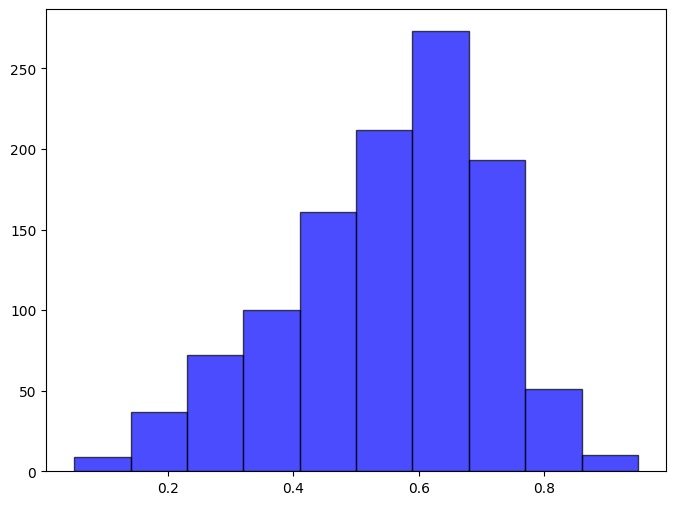

In [71]:
num_bins = 10
data = df[df['id'].isin(dd['train'])]['boneage binned'].values
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=num_bins, color="blue", edgecolor="black", alpha=0.7)

plt.show()